# 1.	使用mini 20 Newsgroups資料集

## Newsgroups資料集介紹
> 20newsgroups資料集是用於文本分類、文本挖據和資訊檢索研究的國際標準資料集之一。資料集收集了大約20,000左右的新聞群組文檔，均勻分為20個不同主題的新聞群組集合。一些新聞群組的主題特別相似(e.g. comp.sys.ibm.pc.hardware/ comp.sys.mac.hardware)，還有一些卻完全不相關 (e.g misc.forsale /soc.religion.christian)。

In [3]:
# 開啟文檔內容
with open('C:/Users/jimmy/OneDrive/yuntech/碩班/學習資源/雲科_資料探勘/HW/hw_3/mini_newsgroups/alt.atheism/51121', 'r') as f:
    content = f.read() # 讀取檔案內容
    print(content, end = '') # 印出時結尾不印new line

Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51121 soc.motss:139944 rec.scouting:5318
Newsgroups: alt.atheism,soc.motss,rec.scouting
Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!fs7.ece.cmu.edu!europa.eng.gtefsd.com!howland.reston.ans.net!wupost!uunet!newsgate.watson.ibm.com!yktnews.watson.ibm.com!watson!Watson.Ibm.Com!strom
From: strom@Watson.Ibm.Com (Rob Strom)
Subject: Re: [soc.motss, et al.] "Princeton axes matching funds for Boy Scouts"
Sender: @watson.ibm.com
Message-ID: <1993Apr05.180116.43346@watson.ibm.com>
Date: Mon, 05 Apr 93 18:01:16 GMT
Distribution: usa
References: <C47EFs.3q47@austin.ibm.com> <1993Mar22.033150.17345@cbnewsl.cb.att.com> <N4HY.93Apr5120934@harder.ccr-p.ida.org>
Organization: IBM Research
Lines: 15

In article <N4HY.93Apr5120934@harder.ccr-p.ida.org>, n4hy@harder.ccr-p.ida.org (Bob McGwier) writes:

|> [1] HOWEVER, I hate economic terrorism and political correctness
|> worse than I hate this policy.  


|> [2] A more effective approach is to stop

## 前處理

In [4]:
# 取得資料夾的路徑
def AutoGetfolderPath(ProcessedPath):
    import os
    fileDir = ProcessedPath
    folderlist = os.listdir(fileDir)
    return folderlist

In [5]:
folderList = AutoGetfolderPath('C:/Users/jimmy/OneDrive/yuntech/碩班/學習資源/雲科_資料探勘/HW/hw_3/mini_newsgroups')
print(folderList)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [6]:
# 取得fiile的路徑
def AutoGetFilePath(ProcessedPath):
    import os
    fileDir = ProcessedPath
    filelist = os.listdir(fileDir)
    return filelist

In [7]:
# 讀檔案
def ReadFile(ProcessedPath):
    with open(ProcessedPath, 'r') as f:
        #去除換行與空白
        return(f.read())

In [8]:
ReadFile('C:/Users/jimmy/OneDrive/yuntech/碩班/學習資源/雲科_資料探勘/HW/hw_3/mini_newsgroups/alt.atheism/51121')

'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51121 soc.motss:139944 rec.scouting:5318\nNewsgroups: alt.atheism,soc.motss,rec.scouting\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!fs7.ece.cmu.edu!europa.eng.gtefsd.com!howland.reston.ans.net!wupost!uunet!newsgate.watson.ibm.com!yktnews.watson.ibm.com!watson!Watson.Ibm.Com!strom\nFrom: strom@Watson.Ibm.Com (Rob Strom)\nSubject: Re: [soc.motss, et al.] "Princeton axes matching funds for Boy Scouts"\nSender: @watson.ibm.com\nMessage-ID: <1993Apr05.180116.43346@watson.ibm.com>\nDate: Mon, 05 Apr 93 18:01:16 GMT\nDistribution: usa\nReferences: <C47EFs.3q47@austin.ibm.com> <1993Mar22.033150.17345@cbnewsl.cb.att.com> <N4HY.93Apr5120934@harder.ccr-p.ida.org>\nOrganization: IBM Research\nLines: 15\n\nIn article <N4HY.93Apr5120934@harder.ccr-p.ida.org>, n4hy@harder.ccr-p.ida.org (Bob McGwier) writes:\n\n|> [1] HOWEVER, I hate economic terrorism and political correctness\n|> worse than I hate this policy.  \n\n\n|> [2] A more effective

In [9]:
x_can = []
# 批次讀檔案
processedPath = "C:/Users/jimmy/OneDrive/yuntech/碩班/學習資源/雲科_資料探勘/HW/hw_3/mini_newsgroups"
folderList = AutoGetfolderPath(processedPath)
for i in range(len(folderList)):
    gotoPath = processedPath + "/" + folderList[i]
    # print(gotoPath)
    readfileList = AutoGetFilePath(gotoPath)
    for j in range(len(readfileList)):
        filepath = gotoPath + "/" + readfileList[i]
        # print(filepath)
        content = ReadFile(filepath)
        x_can.append(content)

![image](https://imgur.com/af0orlR.png)
* 共有2000個檔案

In [10]:
len(x_can)

2000

## sklearn文字特徵提取
* 套件:
    * CountVectorizer
    * TfidfVectorizer
* 方法
    * tf-idf（英語：term frequency–inverse document frequency）是一種用於資訊檢索與文字挖掘的常用加權技術。
    * tf-idf是一種統計方法，用以評估一字詞對於一個檔案集或一個語料庫中的其中一份檔案的重要程度。
    * 字詞的重要性隨著它在檔案中出現的次數成正比增加，但同時會隨著它在語料庫中出現的頻率成反比下降。
    * tf-idf加權的各種形式常被搜尋引擎應用，作為檔案與使用者查詢之間相關程度的度量或評級。
* 原理:
![Image](https://imgur.com/eFqr6Ig.png)
> [參考來源Wiki](https://zh.wikipedia.org/wiki/Tf-idf)


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [12]:
vectorizer = CountVectorizer(stop_words=None, token_pattern="(?u)\\b\\w+\\b")  
X = vectorizer.fit_transform(x_can)
r = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
print("CountVector")
r

CountVector


,0,00,001319,00ecgillespi,00ecgillespie,01,02,022947,03,033150,...,yorktown,you,your,yours,yoy,zaphod,zephyr,zoo,zoology,zrepachol
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,2,3,0,0,1,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,2,3,0,0,1,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,2,3,0,0,1,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,2,3,0,0,1,0,0,0,0


In [13]:
transformer = TfidfTransformer(smooth_idf=True)
Z = transformer.fit_transform(X)
r = pd.DataFrame(Z.toarray(),columns=vectorizer.get_feature_names())
print("TFIDF")
r

TFIDF


,0,00,001319,00ecgillespi,00ecgillespie,01,02,022947,03,033150,...,yorktown,you,your,yours,yoy,zaphod,zephyr,zoo,zoology,zrepachol
0,0.0,0.0,0.0,0.0,0.0,0.048695,0.0,0.0,0.0,0.058855,...,0.058855,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.048695,0.0,0.0,0.0,0.058855,...,0.058855,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.048695,0.0,0.0,0.0,0.058855,...,0.058855,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.048695,0.0,0.0,0.0,0.058855,...,0.058855,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.048695,0.0,0.0,0.0,0.058855,...,0.058855,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.030217,0.08685,0.0,0.0,0.017983,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.030217,0.08685,0.0,0.0,0.017983,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.030217,0.08685,0.0,0.0,0.017983,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.030217,0.08685,0.0,0.0,0.017983,0.0,0.0,0.0,0.0


## 分群

### KMeans

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20)
kmeans.fit(r)
y_kmeans = kmeans.predict(r)

In [15]:
len(y_kmeans)

2000

In [16]:
import time
tStart = time.time()  # 計時開始
print('開始')
from sklearn import cluster, datasets
# KMeans 演算法
kmeans_fit = cluster.KMeans(n_clusters = 20,random_state= 3).fit(r)
# 印出分群結果
cluster_labels = kmeans_fit.labels_
print("分群結果：")
print(cluster_labels)
print("---")
tEnd = time.time()  # 計時結束
print("It cost %f sec" % (tEnd - tStart))
# 會自動做近位
print(tEnd - tStart)
# 原型長這樣
print('結束')

開始
分群結果：
[ 4  4  4 ... 19 19 19]
---
It cost 1.757416 sec
1.757415533065796
結束


#### KMeans，使用Purity指標衡量分群品質
![Image](https://imgur.com/0pnq4Tc.png)

In [17]:
kmeans_r = r
kmeans_r["Cluster"] = cluster_labels

In [18]:
kmeans_clusterResults = kmeans_r.groupby("Cluster").sum()
kmeans_clusterResults

,0,00,001319,00ecgillespi,00ecgillespie,01,02,022947,03,033150,...,yorktown,you,your,yours,yoy,zaphod,zephyr,zoo,zoology,zrepachol
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,15.061726,0.000000,3.206683,0.000000,1.991950,0.000000,0.000000,0.000000,0.000000
1,13.468352,0.000000,0.000000,0.000000,0.000000,0.000000,11.256443,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,5.076893,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,2.754150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,10.435044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,4.221474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,4.869454,0.000000,0.000000,0.000000,5.88552,...,5.88552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,2.482633,0.000000,0.000000,0.000000,2.955009,0.000000,0.000000,0.000000,13.103642
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,20.825699,0.000000,0.000000,0.000000
7,0.000000,4.553713,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,2.376522,0.000000,0.000000,0.000000,2.828708,0.000000,0.000000,0.000000,0.000000
8,7.762289,0.000000,0.000000,6.487487,6.487487,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [19]:
purityList = []
total = 0
for i in range(20):
    purity = kmeans_clusterResults.loc[i].max()/kmeans_clusterResults.loc[i].sum()
    purityList.append(purity)
    total = total + kmeans_clusterResults.loc[i].sum()

In [20]:
print("個別群組的純度:\n",purityList)
print("總和:\n",total)

個別群組的純度:
 [0.0165551877197456, 0.042532133206295356, 0.055151554987663755, 0.013603571778659068, 0.04225395545730688, 0.036646226714117484, 0.04955328786749405, 0.03334781279220566, 0.04726774415732239, 0.052137951140585274, 0.0318543123559687, 0.030690052904028518, 0.014270649589101703, 0.020579530919217378, 0.03459178091498465, 0.04065221547251138, 0.02479802505224435, 0.025785916270591302, 0.02396825088274445, 0.035842119921432276]
總和:
 20475.661575322883


In [21]:
#Total's purity
Total_purity = 0
for i in range(len(purityList)):
    Total_purity = Total_purity + purityList[i]*(kmeans_clusterResults.loc[i].sum()/total)
print("群組的總純度:\n",Total_purity)

群組的總純度:
 0.03182644942498009


### DBSCAN

In [22]:
import time
tStart = time.time()  # 計時開始
print('開始')
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=15, min_samples=20)
dbscan.fit(r)
y_dbscan = dbscan.labels_
print(y_dbscan)
print("---")
tEnd = time.time()  # 計時結束
print("It cost %f sec" % (tEnd - tStart))
# 會自動做近位
print(tEnd - tStart)
# 原型長這樣
print('結束')

開始
[0 0 0 ... 0 0 0]
---
It cost 1.486516 sec
1.486515998840332
結束


In [23]:
len(y_dbscan)

2000

In [24]:
dbscan_r = r
dbscan_r["Cluster"] = y_dbscan
dbscan_r

,0,00,001319,00ecgillespi,00ecgillespie,01,02,022947,03,033150,...,you,your,yours,yoy,zaphod,zephyr,zoo,zoology,zrepachol,Cluster
0,0.0,0.0,0.0,0.0,0.0,0.048695,0.0,0.0,0.0,0.058855,...,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.048695,0.0,0.0,0.0,0.058855,...,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.048695,0.0,0.0,0.0,0.058855,...,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.048695,0.0,0.0,0.0,0.058855,...,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.048695,0.0,0.0,0.0,0.058855,...,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.030217,0.08685,0.0,0.0,0.017983,0.0,0.0,0.0,0.0,0
1996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.030217,0.08685,0.0,0.0,0.017983,0.0,0.0,0.0,0.0,0
1997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.030217,0.08685,0.0,0.0,0.017983,0.0,0.0,0.0,0.0,0
1998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.030217,0.08685,0.0,0.0,0.017983,0.0,0.0,0.0,0.0,0


In [25]:
dbscan_clusterResults = dbscan_r.groupby("Cluster").sum()
dbscan_clusterResults

,0,00,001319,00ecgillespi,00ecgillespie,01,02,022947,03,033150,...,yorktown,you,your,yours,yoy,zaphod,zephyr,zoo,zoology,zrepachol
Cluster,,,,,,,,,,,,,,,,,,,,,
0,43.79439,14.596485,7.915076,6.487487,6.487487,11.418086,11.256443,8.886925,11.682111,5.88552,...,5.88552,63.489505,18.653348,12.047339,7.915076,26.087677,20.825699,19.064694,12.709796,13.103642


In [26]:
dbscan_purity = kmeans_clusterResults.loc[0].max()/kmeans_clusterResults.loc[0].sum()
print("dbscan的分群只有一群，群組的purity只有一個:",dbscan_purity)

dbscan的分群只有一群，群組的purity只有一個: 0.0165551877197456


### 階層式分群

In [27]:
import time
tStart = time.time()  # 計時開始
print('開始')
from sklearn.cluster import AgglomerativeClustering
#Agglomerative Clustering method
# setting distance_threshold=0 ensures we compute the full tree.
agglomerativeClustering = AgglomerativeClustering(n_clusters = 20, linkage = 'ward')
#linkage: ['ward', 'complete', 'average']
agglomerativeClustering.fit(r)
agglomerativeClustering_labels = agglomerativeClustering.fit_predict(r)
print(agglomerativeClustering_labels)
print("---")
tEnd = time.time()  # 計時結束
print("It cost %f sec" % (tEnd - tStart))
# 會自動做近位
print(tEnd - tStart)
# 原型長這樣
print('結束')

開始
[19 19 19 ... 17 17 17]
---
It cost 7.858058 sec
7.858058214187622
結束


In [28]:
len(agglomerativeClustering_labels)

2000

In [29]:
agglomerativeClustering_r = r
agglomerativeClustering_r["Cluster"] = agglomerativeClustering_labels
agglomerativeClustering_r

,0,00,001319,00ecgillespi,00ecgillespie,01,02,022947,03,033150,...,you,your,yours,yoy,zaphod,zephyr,zoo,zoology,zrepachol,Cluster
0,0.0,0.0,0.0,0.0,0.0,0.048695,0.0,0.0,0.0,0.058855,...,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,19
1,0.0,0.0,0.0,0.0,0.0,0.048695,0.0,0.0,0.0,0.058855,...,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,19
2,0.0,0.0,0.0,0.0,0.0,0.048695,0.0,0.0,0.0,0.058855,...,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,19
3,0.0,0.0,0.0,0.0,0.0,0.048695,0.0,0.0,0.0,0.058855,...,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,19
4,0.0,0.0,0.0,0.0,0.0,0.048695,0.0,0.0,0.0,0.058855,...,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.030217,0.08685,0.0,0.0,0.017983,0.0,0.0,0.0,0.0,17
1996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.030217,0.08685,0.0,0.0,0.017983,0.0,0.0,0.0,0.0,17
1997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.030217,0.08685,0.0,0.0,0.017983,0.0,0.0,0.0,0.0,17
1998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.030217,0.08685,0.0,0.0,0.017983,0.0,0.0,0.0,0.0,17


In [30]:
agglomerativeClustering_clusterResults = agglomerativeClustering_r.groupby("Cluster").sum()
agglomerativeClustering_clusterResults

,0,00,001319,00ecgillespi,00ecgillespie,01,02,022947,03,033150,...,yorktown,you,your,yours,yoy,zaphod,zephyr,zoo,zoology,zrepachol
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,8.597884,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,4.553713,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,2.376522,0.000000,0.000000,0.000000,2.828708,0.000000,0.000000,0.000000,0.000000
2,13.468352,0.000000,0.000000,0.000000,0.000000,0.000000,11.256443,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,5.076893,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,8.390011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,5.173404,0.000000,0.000000,0.000000,3.078879,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,2.754150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,15.061726,0.000000,3.206683,0.000000,1.991950,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.544729,0.00000,...,0.00000,0.000000,0.000000,4.544729,0.000000,2.823127,0.000000,0.000000,0.000000,0.000000


In [31]:
purityList = []
total = 0
for i in range(20):
    purity = agglomerativeClustering_clusterResults.loc[i].max()/agglomerativeClustering_clusterResults.loc[i].sum()
    purityList.append(purity)
    total = total +agglomerativeClustering_clusterResults.loc[i].sum()

In [32]:
print("個別群組的純度:\n",purityList)
print("總和:\n",total)

個別群組的純度:
 [0.030690052904028518, 0.03334781279220566, 0.042532133206295356, 0.052137951140585274, 0.02479802505224435, 0.055151554987663755, 0.020579530919217378, 0.0165551877197456, 0.03459178091498465, 0.04726774415732239, 0.014270649589101703, 0.04955328786749405, 0.0318543123559687, 0.04065221547251138, 0.036646226714117484, 0.025785916270591302, 0.013603571778659068, 0.035842119921432276, 0.02396825088274445, 0.04225395545730688]
總和:
 20475.661575322887


In [33]:
#Total's purity
Total_purity = 0
for i in range(len(purityList)):
    Total_purity = Total_purity + purityList[i]*(agglomerativeClustering_clusterResults.loc[i].sum()/total)
print("群組的總純度:\n",Total_purity)

群組的總純度:
 0.031826449424980086


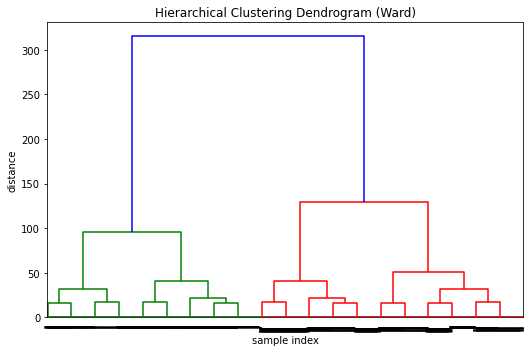

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
# Performs hierarchical/agglomerative clustering on X by using "Ward's method"
linkage_matrix = linkage(r, 'ward')
figure = plt.figure(figsize=(7.5, 5))
# Plots the dendrogram
dendrogram(linkage_matrix, labels = agglomerativeClustering_labels)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

In [35]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

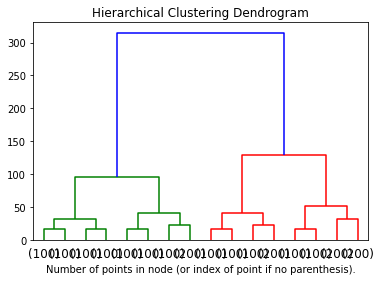

In [36]:
# plot the top three levels of the dendrogram
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(r)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()